In [1]:
%config Completer.use_jedi = False

import pandas as pd
import numpy as np

import os

import seaborn as sns
from matplotlib import pyplot as plt

from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression
sns.set_palette('YlGnBu', 3)

In [2]:
ercc = pd.read_csv('../data/external/cms_095046.txt',
                  sep='\t', header=0, index_col=1)

In [3]:
dirnames = os.listdir('../results/demultiplexed-ercc/exp2/')
try:
    dirnames.remove('.DS_Store')
except:
    pass

In [4]:
meta = pd.read_csv('../data/all_new_data/Drop_2nd_exp_NHD_file_sample_barcode_list.csv',
                     sep=',', header=0, index_col=None).iloc[:15]
meta['r'] = 0.0
meta['sens'] = 0.0
meta['n'] = [500]*5 + [250]*5 + [125]*5

In [5]:
for i in meta.index:
    name = meta.loc[i, 'sequencing_file'].split('-')[0].split('_')[-1]
    data = pd.read_csv('../results/demultiplexed-ercc/exp2/jemultiplexer.out.%s/DMSO_DMSO_CCAATATGTGGCGGCAGATTCGGCT/abundance.tsv' % name,
                  sep='\t', header=0, index_col=0)
    y = data.loc[ercc.index]['tpm']
    x = ercc['concentration in Mix 1 (attomoles/ul)']
    fil = y>0
    r = pearsonr(np.log10(y[fil]), np.log10(x[fil]))[0]
    y = (y>0) * 1
    model = LogisticRegression(penalty='none')
    model.fit(np.log10(x).values.reshape(-1, 1), y)
    s = -(model.intercept_ / model.coef_)[0][0]
    meta.loc[i, ['r', 'sens']] = r, s

In [6]:
meta[['n', 'r', 'sens']].groupby('n').mean()

,r,sens
n,,
125,0.629145,2.553822
250,0.653652,2.058237
500,0.699292,1.476439


In [9]:
meta.to_csv('/Users/benceszalai/Desktop/sd.csv')

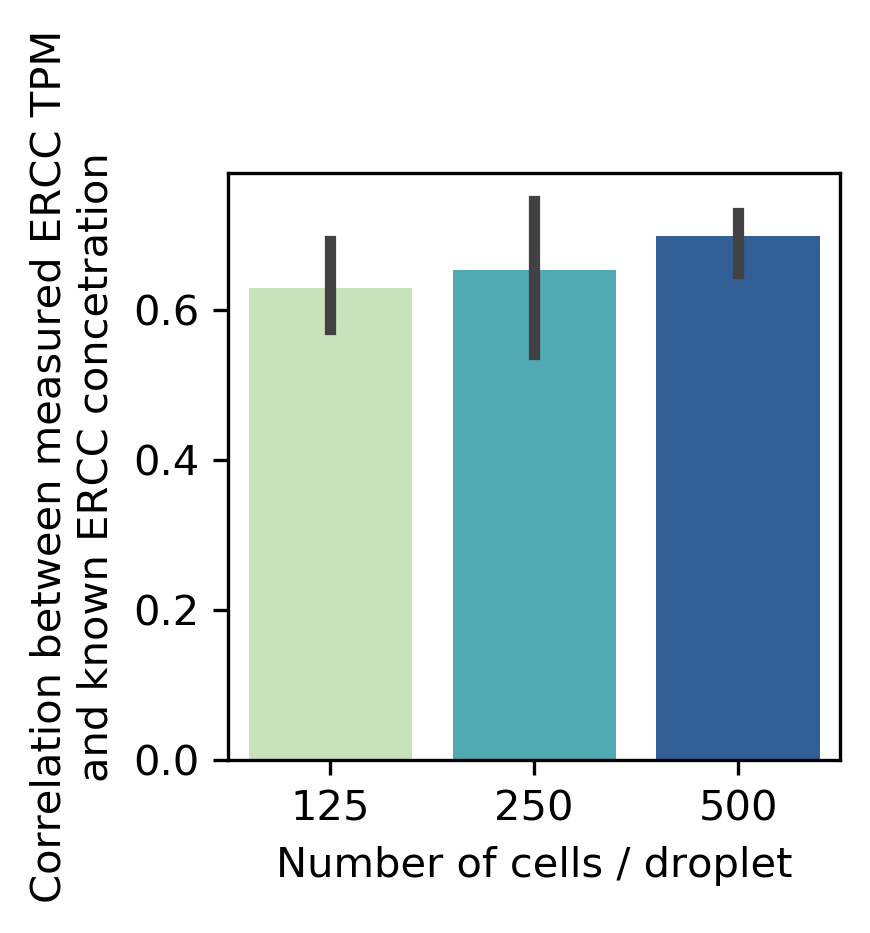

In [7]:
plt.figure(figsize=(3,3), dpi=300)
sns.set_palette('YlGnBu', 3)
sns.barplot(x='n', y='r', data=meta)
plt.xlabel('Number of cells / droplet')
plt.ylabel('Correlation between measured ERCC TPM\nand known ERCC concetration')
plt.tight_layout()
#plt.savefig('../figures/new/ERCC-acc.pdf')

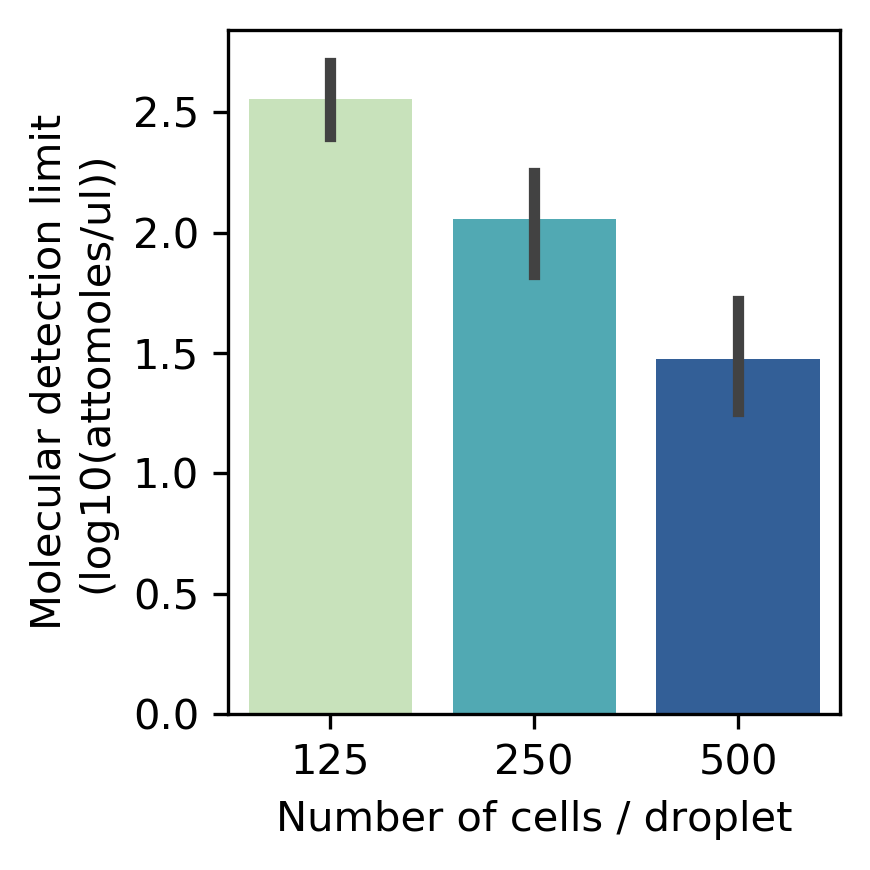

In [133]:
plt.figure(figsize=(3,3), dpi=300)
sns.set_palette('YlGnBu', 3)
sns.barplot(x='n', y='sens', data=meta)
plt.xlabel('Number of cells / droplet')
plt.ylabel('Molecular detection limit\n(log10(attomoles/ul))')
plt.tight_layout()
plt.savefig('../figures/new/ERCC-sens.pdf')

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


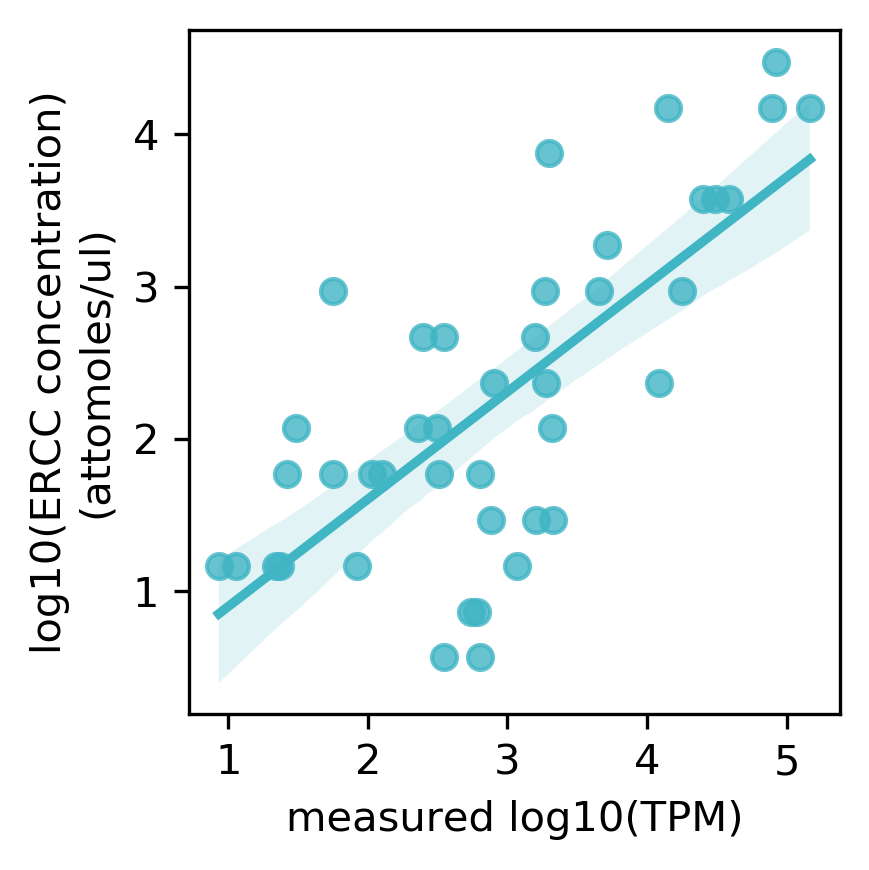

In [10]:
plt.figure(figsize=(3,3), dpi=300)
sns.set_palette('YlGnBu', 1)
i = 0
name = meta.loc[i, 'sequencing_file'].split('-')[0].split('_')[-1]
data = pd.read_csv('../results/demultiplexed-ercc/exp2/jemultiplexer.out.%s/DMSO_DMSO_CCAATATGTGGCGGCAGATTCGGCT/abundance.tsv' % name,
                  sep='\t', header=0, index_col=0)
y = data.loc[ercc.index]['tpm']
x = ercc['concentration in Mix 1 (attomoles/ul)']
fil = y>0
sns.regplot(np.log10(y[fil]), np.log10(x[fil]))
plt.xlabel('measured log10(TPM)')
plt.ylabel('log10(ERCC concentration)\n(attomoles/ul)')
plt.tight_layout()
#plt.savefig('../figures/new/ERCC-acc-example.pdf')

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


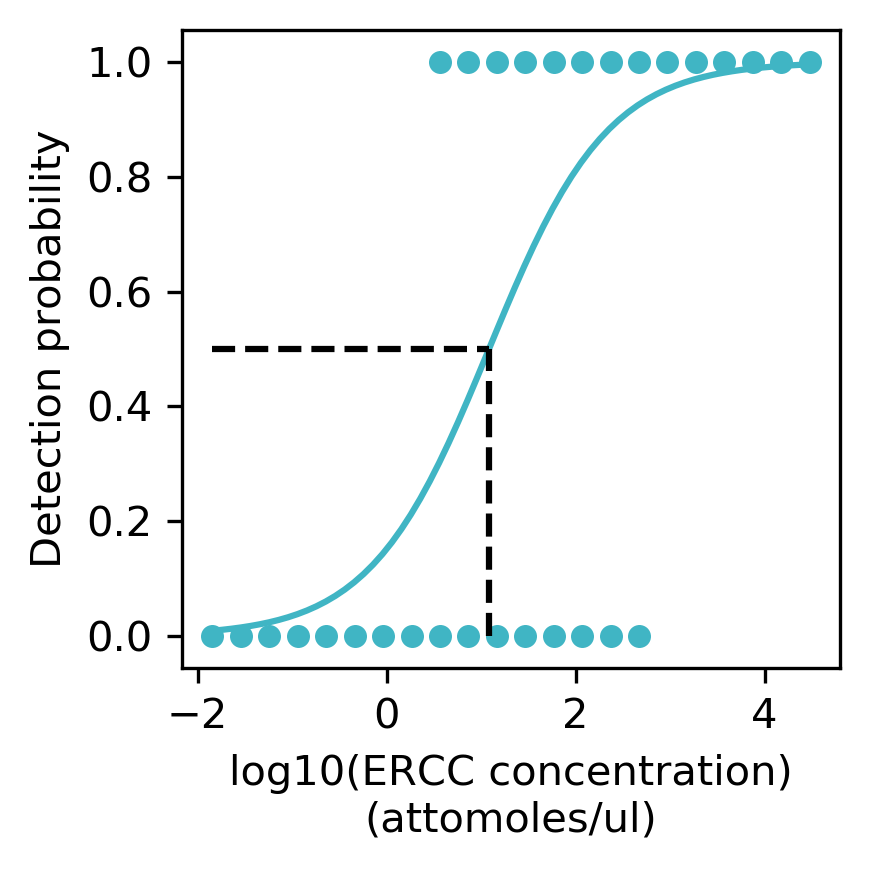

In [30]:
plt.figure(figsize=(3,3), dpi=300)
sns.set_palette('YlGnBu', 1)
i = 0
name = meta.loc[i, 'sequencing_file'].split('-')[0].split('_')[-1]
data = pd.read_csv('../results/demultiplexed-ercc/exp2/jemultiplexer.out.%s/DMSO_DMSO_CCAATATGTGGCGGCAGATTCGGCT/abundance.tsv' % name,
                  sep='\t', header=0, index_col=0)
y = data.loc[ercc.index]['tpm']
x = ercc['concentration in Mix 1 (attomoles/ul)']
y = (y>0) * 1
model = LogisticRegression(fit_intercept=True, solver='liblinear')
model.fit(np.log10(x).values.reshape(-1, 1), y)
sns.scatterplot(np.log10(x), y)
a, b = min(np.log10(x)), max(np.log10(x))
x = np.arange(a,b,0.1)
plt.plot(x, model.predict_proba(x.reshape(-1, 1))[:,1])
plt.xlabel('log10(ERCC concentration)\n(attomoles/ul)')
plt.ylabel('Detection probability')
s = -(model.intercept_ / model.coef_)[0][0]
plt.plot([s,s], [0,0.5], '--k')
plt.plot([a, s], [0.5, 0.5], '--k')
plt.tight_layout()
#plt.savefig('../figures/new/ERCC-sens-example.pdf')

In [34]:
y = data.loc[ercc.index]['tpm']
x = ercc['concentration in Mix 1 (attomoles/ul)']
y = (y>0) * 1
temp = pd.DataFrame(index=y.index, columns=['log10(ERCCconc)', 'Detection probability'])
temp['log10(ERCCconc)'] = np.log10(x)
temp['Detection probability'] = y

temp.to_csv('/Users/benceszalai/Desktop/sd.csv')

In [27]:
y = data.loc[ercc.index]['tpm']
x = ercc['concentration in Mix 1 (attomoles/ul)']

In [31]:
len(x)

64